## Laboratorium 3

### Opis
Celem laboratorium jest klasyfikacja liści za pomocą metody *k* najbliższych sąsiadów - *k*NN (*k Nearest Neighbors*) z wykorzystaniem normalizacji.


### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`. Jest to zmodyfikowany zbiór danych znajdujący się pod adresem: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab03.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```



### Zadanie 1

* Wybierz 10 dowolnych gatunków liści (będziesz je używać w kolejnych zadaniach) oraz wszystkie cechy.
* Przeprowadź klasyfikację za pomocą klasyfikatora [*k*NN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).
* Znajdź optymalne *k*.
* Wyświetl najwyższy wynik klasyfikacji (*accuracy*).


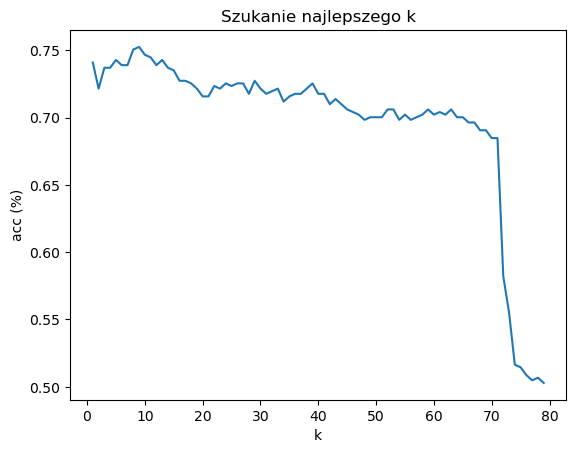

Najlepszy wnik 75.24177949709865% dla k -> 9


In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
    
features = list(range(2, 16))
classes = list(range(1, 11))

mask = np.isin(train[:,0], classes)

X_train = train[mask]
X_train = X_train[:, features]

Y_train = train[mask]
Y_train = Y_train[:, 0]

mask = np.isin(test[:,0], classes)
X_test = test[mask]
X_test = X_test[:, features]

Y_test = test[mask]
Y_test = Y_test[:, 0]

results = []
for i in range(1, 80):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)

    results.append(accuracy_score(neigh.predict(X_test), Y_test))
    
plt.plot(list(range(1,80)), results, label='Wyniki')
plt.xlabel('k')
plt.ylabel('acc (%)')
plt.title('Szukanie najlepszego k')
plt.show()

best_value = max(results)  
best_index = results.index(best_value)+1

print(f'Najlepszy wnik {best_value*100}% dla k -> {best_index}')

### Zadanie 2
* Znormalizuj dane w zakresie 0-1. Możesz do tego celu wykorzystać gotową funkcję z biblioteki scikit-learn https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html.
>    **Ważne: współczynniki powinny być obliczone na zbiorze treningowym i te same powinny zostać zastosowane do normalizacji zbioru testowego.**
* Ponownie wykonaj klasyfikację z tymi samymi parametrami (co w zadaniu 1), ale na danych znormalizowanych.
* Znajdź optymalne *k*.
* Wyświetl wynik w postaci wykresu, gdzie na osi X znajduje się *k*, a na osi Y *accuracy*.
* Wyświetl najwyższy wynik klasyfikacji (*accuracy*).


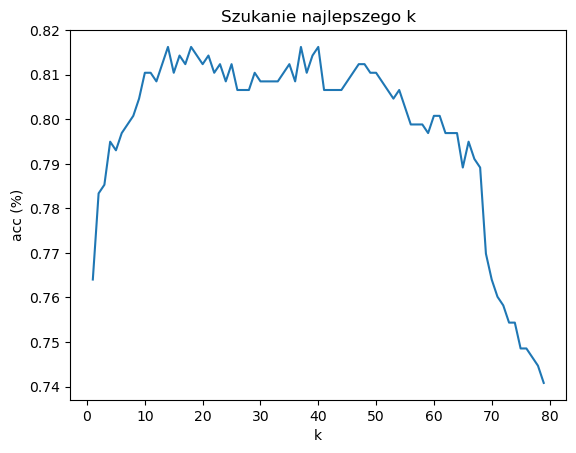

Najlepszy wnik 81.6247582205029% dla k -> 14


In [2]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


results = []
for i in range(1, 80):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_scaled, Y_train)

    results.append(accuracy_score(neigh.predict(X_test_scaled), Y_test))
    
plt.plot(list(range(1,80)), results, label='Wyniki')
plt.xlabel('k')
plt.ylabel('acc (%)')
plt.title('Szukanie najlepszego k')
plt.show()

best_value = max(results)  
best_index = results.index(best_value)+1

print(f'Najlepszy wnik {best_value*100}% dla k -> {best_index}')

### Zadanie 3

Napisz wnioski

- im więcej k tym wyniki niższe 
- przy normalizacji dane są zbliżone do paraboli 
- po normalizacji wyniki są wyższe 